In [2]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk

# Download NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Load dataset
data = pd.read_csv('/content/emotions.csv')

# Handle missing values and duplicates
print("Missing values before handling:")
print(data.isnull().sum())
data.dropna(inplace=True)
data.drop_duplicates(subset='text', inplace=True)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Missing values before handling:
text     0
label    1
dtype: int64


In [3]:
# Show class distribution
print("\nClass distribution:")
print(data['label'].value_counts())

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing
data['cleaned_text'] = data['text'].apply(preprocess_text)

# Encode labels
label_encoder = LabelEncoder()
data['encoded_label'] = label_encoder.fit_transform(data['label'])


Class distribution:
label
1.0    85572
0.0    74602
3.0    34611
4.0    28075
2.0    19363
5.0     8357
Name: count, dtype: int64


In [4]:
# Train-test split
X = data['cleaned_text']
y = data['encoded_label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# # TF-IDF Vectorization
# tfidf = TfidfVectorizer(max_features=5000)
# X_train_tfidf = tfidf.fit_transform(X_train)
# X_test_tfidf = tfidf.transform(X_test)


# TF-IDF Vectorization with reduced features
tfidf = TfidfVectorizer(max_features=20000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Optional: use only a subset of training data for faster SVM training
X_train_tfidf = X_train_tfidf[:20000]
y_train = y_train[:20000]


Training and evaluating SVM with linear kernel...

SVM with linear kernel:
Accuracy: 0.8647
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90     14920
         1.0       0.87      0.91      0.89     17115
         2.0       0.82      0.62      0.70      3873
         3.0       0.86      0.86      0.86      6922
         4.0       0.84      0.83      0.83      5615
         5.0       0.71      0.78      0.74      1671

    accuracy                           0.86     50116
   macro avg       0.83      0.82      0.82     50116
weighted avg       0.86      0.86      0.86     50116



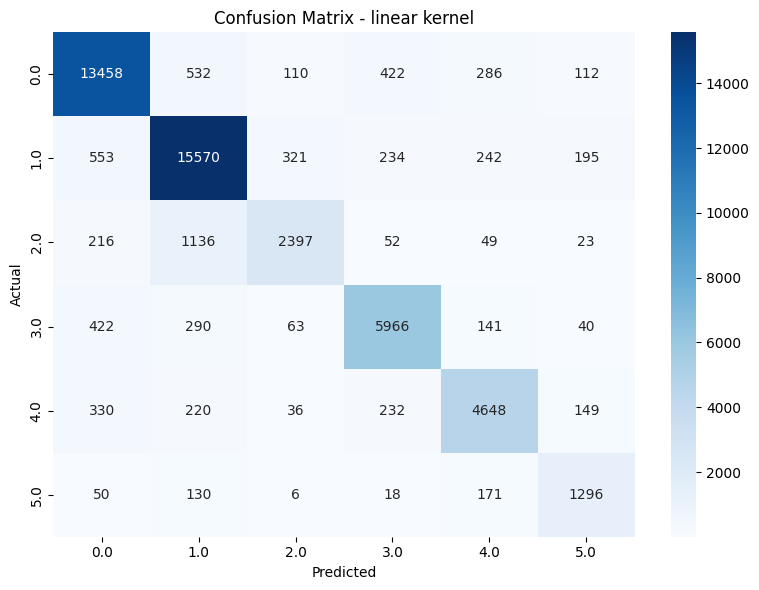


Training and evaluating SVM with poly kernel...

SVM with poly kernel:
Accuracy: 0.6318
              precision    recall  f1-score   support

         0.0       0.84      0.72      0.78     14920
         1.0       0.51      0.98      0.67     17115
         2.0       0.90      0.12      0.22      3873
         3.0       0.93      0.29      0.44      6922
         4.0       0.92      0.24      0.38      5615
         5.0       0.84      0.14      0.23      1671

    accuracy                           0.63     50116
   macro avg       0.82      0.42      0.45     50116
weighted avg       0.75      0.63      0.59     50116



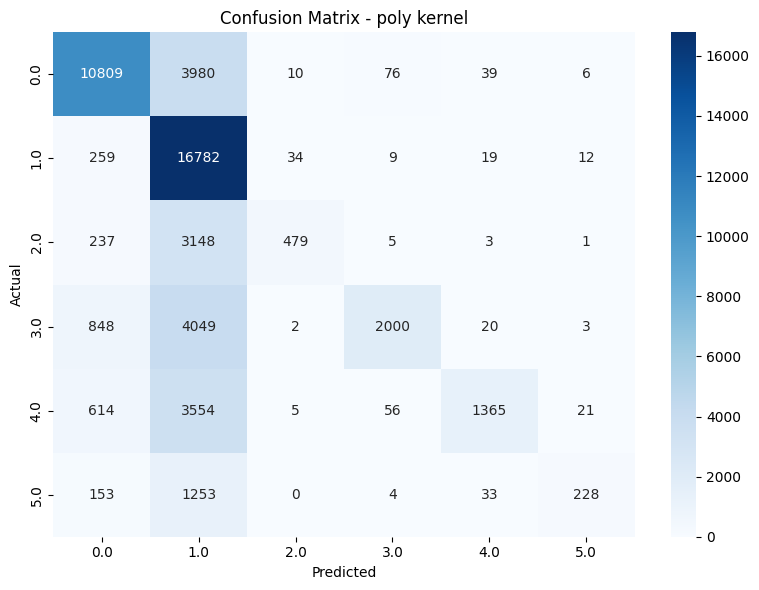


Training and evaluating SVM with rbf kernel...

SVM with rbf kernel:
Accuracy: 0.8483
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89     14920
         1.0       0.82      0.93      0.87     17115
         2.0       0.85      0.52      0.65      3873
         3.0       0.88      0.81      0.84      6922
         4.0       0.86      0.77      0.81      5615
         5.0       0.77      0.65      0.70      1671

    accuracy                           0.85     50116
   macro avg       0.84      0.76      0.79     50116
weighted avg       0.85      0.85      0.84     50116



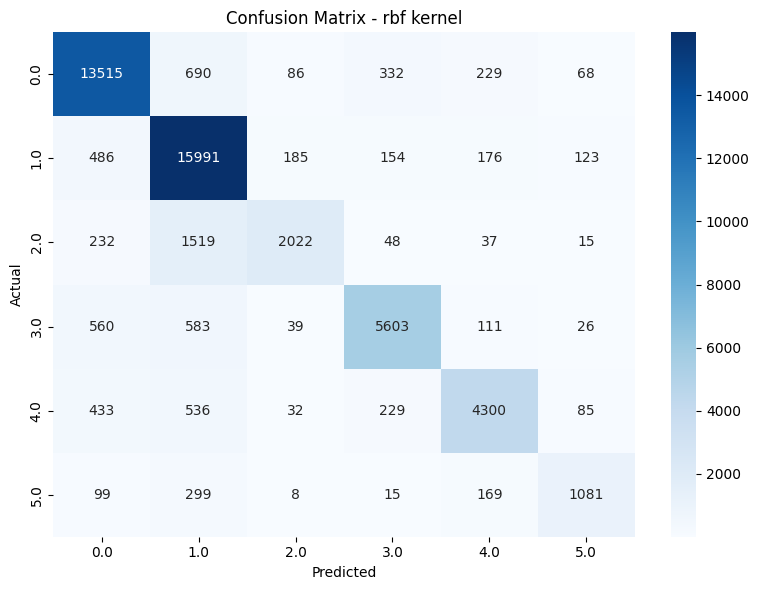


Training and evaluating SVM with sigmoid kernel...

SVM with sigmoid kernel:
Accuracy: 0.8635
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90     14920
         1.0       0.87      0.91      0.89     17115
         2.0       0.82      0.61      0.70      3873
         3.0       0.86      0.86      0.86      6922
         4.0       0.84      0.82      0.83      5615
         5.0       0.71      0.78      0.75      1671

    accuracy                           0.86     50116
   macro avg       0.83      0.81      0.82     50116
weighted avg       0.86      0.86      0.86     50116



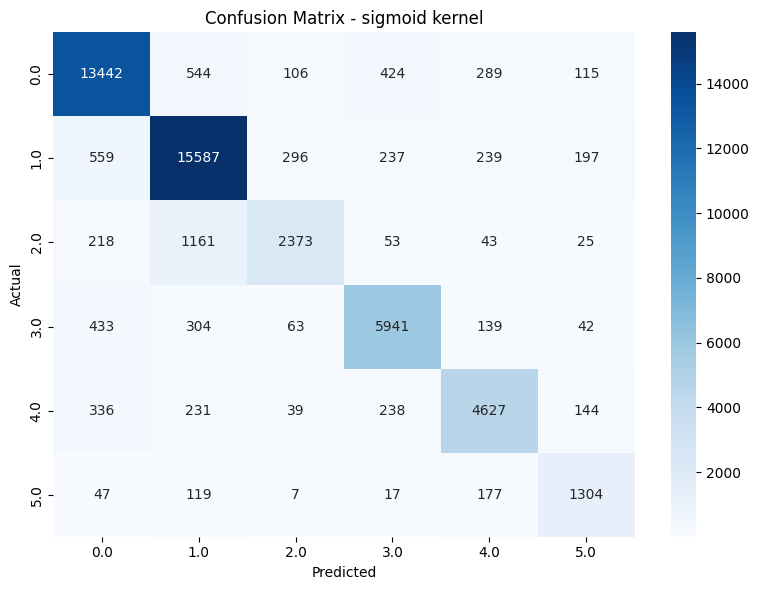

In [5]:

# Function to evaluate SVM with different kernels
def evaluate_svm(kernel_type):
    print(f"\nTraining and evaluating SVM with {kernel_type} kernel...")
    model = SVC(kernel=kernel_type, random_state=42)
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    report_dict = classification_report(
        y_test, y_pred, target_names=label_encoder.classes_, output_dict=True
    )

    print(f"\nSVM with {kernel_type} kernel:")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=[str(cls) for cls in label_encoder.classes_]))


    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix - {kernel_type} kernel')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    return acc, report_dict

# Evaluate kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:
    accuracy, report = evaluate_svm(kernel)
    results[kernel] = {
        'accuracy': accuracy,
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1-score': report['weighted avg']['f1-score']
    }

In [6]:
# Kernel performance summary
results_df = pd.DataFrame(results).T
print("\nPerformance comparison across kernels:")
print(results_df)


Performance comparison across kernels:
         accuracy  precision    recall  f1-score
linear   0.864694   0.864036  0.864694  0.863111
poly     0.631794   0.753763  0.631794  0.589628
rbf      0.848272   0.849788  0.848272  0.843865
sigmoid  0.863477   0.862936  0.863477  0.861786


<Figure size 1000x600 with 0 Axes>

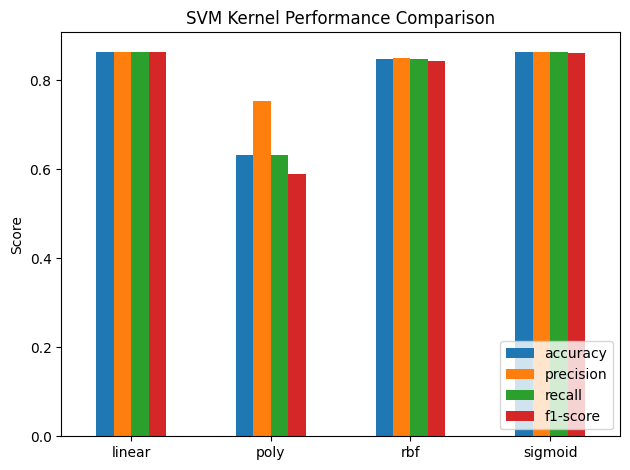

In [7]:
# Plot kernel comparison
plt.figure(figsize=(10, 6))
results_df.plot(kind='bar', y=['accuracy', 'precision', 'recall', 'f1-score'],
                title='SVM Kernel Performance Comparison')
plt.xticks(rotation=0)
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [8]:
# Best kernel
best_kernel = results_df['accuracy'].idxmax()
print(f"\nBest performing kernel: {best_kernel}")


Best performing kernel: linear
